In [118]:
import scipy as sp
import numpy as np
import pandas as pd

import urllib
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
params = {
         "appKey": "FakeKey",
         "targets": '2',
         "startDate":"2010-01-01",
         "endDate":"2010-01-05"}

url = "https://et.water.ca.gov/api/data?appKey=fakeKey&targets=5&startDate=2006-05-01&endDate=2006-08-01&dataItems=day-asce-eto,hly-asce-eto"

try:
    result = urllib.request.urlopen(quoted_url).read()
except Exception as e:
    print(e)

unknown url type: 'https%3A//et.water.ca.gov/api/data%3FappKey%3Dae04592f-7178-4b77-84f2-b8bd20e3214e%26targets%3D5%26startDate%3D2006-05-01%26endDate%3D2006-08-01%26dataItems%3Dday-asce-eto%2Chly-asce-eto'


In [18]:
url

'https://et.water.ca.gov/api/data?appKey=ae04592f-7178-4b77-84f2-b8bd20e3214e&targets=5&startDate=2006-05-01&endDate=2006-08-01&dataItems=day-asce-eto,hly-asce-eto'

In [21]:
import requests

r = requests.get(url)

SSLError: HTTPSConnectionPool(host='et.water.ca.gov', port=443): Max retries exceeded with url: /api/data?appKey=ae04592f-7178-4b77-84f2-b8bd20e3214e&targets=5&startDate=2006-05-01&endDate=2006-08-01&dataItems=day-asce-eto,hly-asce-eto (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))

In [23]:
r = requests.get('https://github.com/timeline.json')

In [24]:
r.url

'https://github.com/timeline.json'

In [93]:
host_name = "https://et.water.ca.gov"
url = "/api/data?"


params = {
         "appKey": "fakeKey",
         "targets": '2',
         "startDate":"2010-01-01",
         "endDate":"2010-01-05",
         "dataItems":["day-asce-eto","hly-asce-eto"]}

r = requests.get(host_name + url, params = params, verify = False)

C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [94]:
r.headers

{'Cache-Control': 'no-cache', 'Pragma': 'no-cache', 'Content-Length': '246', 'Content-Type': 'text/html; charset=utf-8', 'Date': 'Tue, 11 Feb 2020 20:41:01 GMT', 'Via': '1.1 ironport-s680.air-worldwide.com:80 (Cisco-WSA/11.5.1-125)', 'Connection': 'keep-alive'}

In [151]:
start_month = 1
start_day = 2
end_day = 1

list_of_tups = []

def set_queries_by_year_range_and_station_number_hly(start_year, end_year, station_number, appKey = None):
    # this function creates a list of one month queries for selecting
    # daily and hourly ETo data from the CIMIS Datasets on "https://et.water.ca.gov"
    # to get past the data request limits
    # This function will result in a few duplicate entries.
    assert appKey is not None, "You must assign an appKey, please register at https://cimis.water.ca.gov and request an appKey."
    first_day_of_month = 1
    second_day_of_month = 2
    queries = []
    for iYear in range(start_year, end_year + 1, 1):
        start_month = 1
        end_month = 2
        while start_month <= 12:
            temp_dict = {"targets":"%d"%station_number,
                        "appKey": appKey,
                        "dataItems":"hly-asce-eto"}
            if start_month == 1:
                temp_dict["startDate"] = "%d-%d-%d"%(iYear, start_month, first_day_of_month)
            else:
                temp_dict["startDate"] = "%d-%d-%d"%(iYear, start_month, second_day_of_month) # avoid duplicate entries
            temp_dict["endDate"] = "%d-%d-%d"%(iYear, end_month, first_day_of_month)
            queries.append(temp_dict)
            start_month += 1
            end_month += 1
        queries[-1]["endDate"] = "%d-12-31"%(iYear) # correct for setting final date to iYear_year-13-1
    return queries
            
            
            
        
    
    

In [152]:
test = set_queries_by_year_range_and_station_number_hly(2010, 2010, 2, appKey = "fakeKey")

In [153]:
for item in test:
    print(item)

{'targets': '2', 'appKey': 'fakeKey', 'dataItems': 'hly-asce-eto', 'startDate': '2010-1-1', 'endDate': '2010-2-1'}
{'targets': '2', 'appKey': 'fakeKey', 'dataItems': 'hly-asce-eto', 'startDate': '2010-2-2', 'endDate': '2010-3-1'}
{'targets': '2', 'appKey': 'fakeKey', 'dataItems': 'hly-asce-eto', 'startDate': '2010-3-2', 'endDate': '2010-4-1'}
{'targets': '2', 'appKey': 'fakeKey', 'dataItems': 'hly-asce-eto', 'startDate': '2010-4-2', 'endDate': '2010-5-1'}
{'targets': '2', 'appKey': 'fakeKey', 'dataItems': 'hly-asce-eto', 'startDate': '2010-5-2', 'endDate': '2010-6-1'}
{'targets': '2', 'appKey': 'fakeKey', 'dataItems': 'hly-asce-eto', 'startDate': '2010-6-2', 'endDate': '2010-7-1'}
{'targets': '2', 'appKey': 'fakeKey', 'dataItems': 'hly-asce-eto', 'startDate': '2010-7-2', 'endDate': '2010-8-1'}
{'targets': '2', 'appKey': 'fakeKey', 'dataItems': 'hly-asce-eto', 'startDate': '2010-8-2', 'endDate': '2010-9-1'}
{'targets': '2', 'appKey': 'fakeKey', 'dataItems': 'hly-asce-eto', 'startDate': 

In [155]:
test2 = set_queries_by_year_range_and_station_number_hly(2010, 2011, 2, appKey = "fakeKey")
for item in test2:
    print(item)

{'targets': '2', 'appKey': 'fakeKey', 'dataItems': 'hly-asce-eto', 'startDate': '2010-1-1', 'endDate': '2010-2-1'}
{'targets': '2', 'appKey': 'fakeKey', 'dataItems': 'hly-asce-eto', 'startDate': '2010-2-2', 'endDate': '2010-3-1'}
{'targets': '2', 'appKey': 'fakeKey', 'dataItems': 'hly-asce-eto', 'startDate': '2010-3-2', 'endDate': '2010-4-1'}
{'targets': '2', 'appKey': 'fakeKey', 'dataItems': 'hly-asce-eto', 'startDate': '2010-4-2', 'endDate': '2010-5-1'}
{'targets': '2', 'appKey': 'fakeKey', 'dataItems': 'hly-asce-eto', 'startDate': '2010-5-2', 'endDate': '2010-6-1'}
{'targets': '2', 'appKey': 'fakeKey', 'dataItems': 'hly-asce-eto', 'startDate': '2010-6-2', 'endDate': '2010-7-1'}
{'targets': '2', 'appKey': 'fakeKey', 'dataItems': 'hly-asce-eto', 'startDate': '2010-7-2', 'endDate': '2010-8-1'}
{'targets': '2', 'appKey': 'fakeKey', 'dataItems': 'hly-asce-eto', 'startDate': '2010-8-2', 'endDate': '2010-9-1'}
{'targets': '2', 'appKey': 'fakeKey', 'dataItems': 'hly-asce-eto', 'startDate': 

In [156]:
host_name = "https://et.water.ca.gov"
url = "/api/data?"

parameter_set =  set_queries_by_year_range_and_station_number_hly(2010, 2011, 2, appKey = "fakeKey")

resulting_text = [None]*len(parameter_set)

headers = {'accept': "application/xml"}

for iRequest, parameter in enumerate(parameter_set):
    r = requests.get(host_name + url, params = parameter, verify = False, headers=headers)
    
    resulting_text[iRequest] = r.text
r.headers

C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTT

{'Cache-Control': 'no-cache', 'Pragma': 'no-cache', 'Expires': '-1', 'Content-Disposition': 'attachment; filename=data', 'Date': 'Tue, 11 Feb 2020 21:00:25 GMT', 'Set-Cookie': 'TS0177aa26=0172ee179ab5cee79cedc764f199f171a17c9fd2efe089a04e2588e23e7b46f7efa9956ef0b19a06143146b75ff2dbbf5df8785120; Path=/; Domain=.et.water.ca.gov', 'Content-Length': '124558', 'Content-Type': 'application/xml; charset=utf-8', 'Via': '1.1 ironport-s680.air-worldwide.com:80 (Cisco-WSA/11.5.1-125)', 'Connection': 'keep-alive'}

In [157]:
r.text

'<et-xml xmlns:xsd="http://www.w3.org/2001/XMLSchema" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"><data><provider name="cimis" type="station" owner="water.ca.gov"><record date="2011-12-02" julian="336" hour="0100" station="2" standard="english" zip-code="93624" scope="hourly"><hly-asce-eto qc=" " unit="(in)">0</hly-asce-eto></record><record date="2011-12-02" julian="336" hour="0200" station="2" standard="english" zip-code="93624" scope="hourly"><hly-asce-eto qc=" " unit="(in)">0</hly-asce-eto></record><record date="2011-12-02" julian="336" hour="0300" station="2" standard="english" zip-code="93624" scope="hourly"><hly-asce-eto qc=" " unit="(in)">0</hly-asce-eto></record><record date="2011-12-02" julian="336" hour="0400" station="2" standard="english" zip-code="93624" scope="hourly"><hly-asce-eto qc=" " unit="(in)">0</hly-asce-eto></record><record date="2011-12-02" julian="336" hour="0500" station="2" standard="english" zip-code="93624" scope="hourly"><hly-asce-eto qc=" " unit

In [158]:
def process_CIMIS_ETo_xml_file_set_with_downcast(xml_file_set):
    import xml.etree.ElementTree as ET
    nFiles = len(xml_file_set)
    total_df_list = [None]*nFiles
    
    for iFile, xml_file in enumerate(xml_file_set):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        num_elem = len(root.findall('data/provider/record')) ## Assuming XML Formatting is consistent.  record is a child of provider which is a child of data.

        df_list = [None]*num_elem

        for iRecord, record in enumerate(root.iter('record')):
            temp_dict = record.attrib
            try:
                hly_asce_eto_value = record.find("hly-asce-eto").text
                temp_dict["hly_asce_eto"] = hly_asce_eto_value
            except:
                try:
                    daily_asce_eto_value = record.find('day-asce-eto').text
                    temp_dict["day_asce_eto"] = daily_asce_eto_value
                except:
                    print("Neither Hourly or Daily ASCE ETo data found for record", temp_dict)

            df_list[iRecord] = temp_dict
        df = pd.DataFrame(df_list)
        for col in df.columns:
            if col == 'date':
                df[col] = pd.to_datetime(df[col]) # downcast to datetime object
            else:
                try:
                    df[col] = pd.to_numeric(df[col], downcast = 'unsigned') # try to downcast to smallest unsigned int
                    if type(df[col].iloc[0]) == np.float64: # if successfully downcast to float64 from object
                        df[col] = pd.to_numeric(df[col], downcast = 'float') # try to downcast to float 32
                except:
                    df[col] = df[col].astype('category')
        total_df_list[iFile] = df
    
    output = pd.concat(total_df_list)
    return output

In [159]:
def process_CIMIS_ETo_xml_text_list_set_with_downcast(xml_text_set):
    import xml.etree.ElementTree as ET
    nFiles = len(xml_text_set)
    total_df_list = [None]*nFiles
    
    for iFile, xml_text in enumerate(xml_text_set):
        print(iFile)
        root = ET.fromstring(xml_text)
        num_elem = len(root.findall('data/provider/record')) ## Assuming XML Formatting is consistent.  record is a child of provider which is a child of data.

        df_list = [None]*num_elem

        for iRecord, record in enumerate(root.iter('record')):
            temp_dict = record.attrib
            try:
                hly_asce_eto_value = record.find("hly-asce-eto").text
                temp_dict["hly_asce_eto"] = hly_asce_eto_value
            except:
                try:
                    daily_asce_eto_value = record.find('day-asce-eto').text
                    temp_dict["day_asce_eto"] = daily_asce_eto_value
                except:
                    print("Neither Hourly or Daily ASCE ETo data found for record", temp_dict)

            df_list[iRecord] = temp_dict
        df = pd.DataFrame(df_list)
        for col in df.columns:
            if col == 'date':
                df[col] = pd.to_datetime(df[col]) # downcast to datetime object
            else:
                try:
                    df[col] = pd.to_numeric(df[col], downcast = 'unsigned') # try to downcast to smallest unsigned int
                    if type(df[col].iloc[0]) == np.float64: # if successfully downcast to float64 from object
                        df[col] = pd.to_numeric(df[col], downcast = 'float') # try to downcast to float 32
                except:
                    df[col] = df[col].astype('category')
        total_df_list[iFile] = df
    
    output = pd.concat(total_df_list)
    return output

In [160]:
output = process_CIMIS_ETo_xml_text_list_set_with_downcast(resulting_text)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [161]:
output.describe()

,julian,hour,station,zip-code,hly_asce_eto
count,17520.000000,17520.000000,17520.0,17520.0,17476.000000
mean,183.000000,1250.000000,2.0,93624.0,0.006315
std,105.369036,692.238411,0.0,0.0,0.009484
min,1.000000,100.000000,2.0,93624.0,0.000000
25%,92.000000,675.000000,2.0,93624.0,0.000000
50%,183.000000,1250.000000,2.0,93624.0,0.000000
75%,274.000000,1825.000000,2.0,93624.0,0.010000
max,365.000000,2400.000000,2.0,93624.0,0.040000


In [162]:
output.head(20)

,date,julian,hour,station,standard,zip-code,scope,hly_asce_eto
0,2010-01-01,1,100,2,english,93624,hourly,0.00
1,2010-01-01,1,200,2,english,93624,hourly,0.00
2,2010-01-01,1,300,2,english,93624,hourly,0.00
3,2010-01-01,1,400,2,english,93624,hourly,0.00
4,2010-01-01,1,500,2,english,93624,hourly,0.00
5,2010-01-01,1,600,2,english,93624,hourly,0.00
6,2010-01-01,1,700,2,english,93624,hourly,0.00
7,2010-01-01,1,800,2,english,93624,hourly,0.00
8,2010-01-01,1,900,2,english,93624,hourly,0.00
9,2010-01-01,1,1000,2,english,93624,hourly,0.00


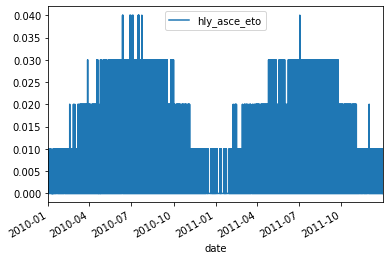

In [163]:
output.plot(x = 'date', y = 'hly_asce_eto')

In [164]:
plt.scatter(output['date'], output["day_asce_eto"])

KeyError: 'day_asce_eto'

In [168]:
def set_queries_by_year_range_and_station_number_daily(start_year, end_year, station_number, appKey = None):
    # this function creates a list of one month queries for selecting
    # daily and hourly ETo data from the CIMIS Datasets on "https://et.water.ca.gov"
    # to get past the data request limits
    # This function will result in a few duplicate entries.
    assert appKey is not None, "You must assign an appKey, please register at https://cimis.water.ca.gov and request an appKey."
    first_day_of_month = 1
    second_day_of_month = 2
    queries = []
    for iYear in range(start_year, end_year + 1, 1):
        start_month = 1
        end_month = 2
        while start_month <= 12:
            temp_dict = {"targets":"%d"%station_number,
                        "appKey": appKey,
                        "dataItems":"day-asce-eto"}
            if start_month == 1:
                temp_dict["startDate"] = "%d-%d-%d"%(iYear, start_month, first_day_of_month)
            else:
                temp_dict["startDate"] = "%d-%d-%d"%(iYear, start_month, second_day_of_month) # avoid duplicate entries
            temp_dict["endDate"] = "%d-%d-%d"%(iYear, end_month, first_day_of_month)
            queries.append(temp_dict)
            start_month += 1
            end_month += 1
        queries[-1]["endDate"] = "%d-12-31"%(iYear) # correct for setting final date to iYear_year-13-1
    return queries
            

In [169]:
host_name = "https://et.water.ca.gov"
url = "/api/data?"

parameter_set =  set_queries_by_year_range_and_station_number_daily(2010, 2011, 2, appKey = "fakeKey")

resulting_text = [None]*len(parameter_set)

headers = {'accept': "application/xml"}

for iRequest, parameter in enumerate(parameter_set):
    r = requests.get(host_name + url, params = parameter, verify = False, headers=headers)
    
    resulting_text[iRequest] = r.text
r.headers

C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTT

{'Cache-Control': 'no-cache', 'Pragma': 'no-cache', 'Expires': '-1', 'Content-Disposition': 'attachment; filename=data', 'Date': 'Tue, 11 Feb 2020 21:02:38 GMT', 'Set-Cookie': 'TS0177aa26=0172ee179a38f826442cc8998e86b81ed8306b7a6f3ed1c8bb1813157e0f628ac898678518babc0a4350b7921e6368839a62b51bc1; Path=/; Domain=.et.water.ca.gov', 'Content-Length': '5058', 'Content-Type': 'application/xml; charset=utf-8', 'Via': '1.1 ironport-s680.air-worldwide.com:80 (Cisco-WSA/11.5.1-125)', 'Connection': 'keep-alive'}

In [170]:
output_daily = process_CIMIS_ETo_xml_text_list_set_with_downcast(resulting_text)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [172]:
output_daily.describe()

,julian,station,zip-code,day_asce_eto
count,730.000000,730.0,730.0,728.000000
mean,183.000000,2.0,93624.0,0.162459
std,105.438271,0.0,0.0,0.100406
min,1.000000,2.0,93624.0,0.000000
25%,92.000000,2.0,93624.0,0.070000
50%,183.000000,2.0,93624.0,0.160000
75%,274.000000,2.0,93624.0,0.260000
max,365.000000,2.0,93624.0,0.380000


In [173]:
output_daily.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 29
Data columns (total 7 columns):
date            730 non-null datetime64[ns]
julian          730 non-null uint16
station         730 non-null uint8
standard        730 non-null category
zip-code        730 non-null uint32
scope           730 non-null category
day_asce_eto    728 non-null float32
dtypes: category(2), datetime64[ns](1), float32(1), uint16(1), uint32(1), uint8(1)
memory usage: 21.0 KB


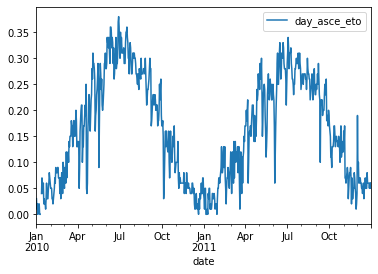

In [174]:
output_daily.plot(x = 'date', y = 'day_asce_eto')

In [175]:
def submit_queries(parameter_set):
    host_name = "https://et.water.ca.gov"
    url = '/api/data?'
    resulting_text = [None]*len(parameter_set)
    
    headers = {'accept': "application/xml"}
    
    for iRequest, parameter in enumerate(parameter_set):
        r = requests.get(host_name + url, params = parameter, verify = False, headers = headers)
        resulting_text[iRequest] = r.text
    return resulting_text

In [1]:
start_year = 2001
end_year = 2015

parameter_set =  set_queries_by_year_range_and_station_number_daily(start_year, end_year, 2, appKey = "fakeKey")

xml_text_set = submit_queries(parameter_set)

large_dataframe = process_CIMIS_ETo_xml_text_list_set_with_downcast(xml_text_set)

NameError: name 'set_queries_by_year_range_and_station_number_daily' is not defined

In [177]:
large_dataframe.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5474 entries, 0 to 29
Data columns (total 7 columns):
date            5474 non-null datetime64[ns]
julian          5474 non-null uint16
station         5474 non-null uint8
standard        5474 non-null category
zip-code        5474 non-null uint32
scope           5474 non-null category
day_asce_eto    5116 non-null float32
dtypes: category(2), datetime64[ns](1), float32(1), uint16(1), uint32(1), uint8(1)
memory usage: 155.3 KB


In [178]:
large_dataframe.describe()

,julian,station,zip-code,day_asce_eto
count,5474.000000,5474.0,5474.0,5116.000000
mean,183.173365,2.0,93624.0,0.173640
std,105.403684,0.0,0.0,0.103666
min,1.000000,2.0,93624.0,0.000000
25%,92.000000,2.0,93624.0,0.080000
50%,183.000000,2.0,93624.0,0.170000
75%,274.000000,2.0,93624.0,0.270000
max,366.000000,2.0,93624.0,0.420000


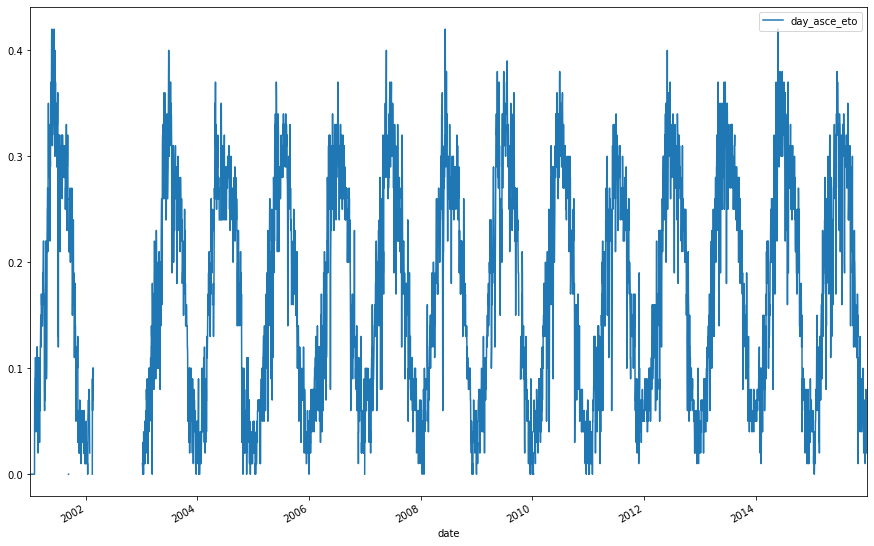

In [182]:
large_dataframe.plot(x = 'date', y = 'day_asce_eto', figsize = [15, 10])